# What to compare:
- number of objects
    - what caused one data set to not have asteroids that are in the other
         - date?
         - ip plot for each?
         - data quality (number of observation)?
         - size?
- IP_cum of each
    - SD of each?
- PS_cum of each

- How in agreement their probabilities are
    - How are the differences in probability distributed
    - establish the agreement
    - V infinity
# Some results:
- Both data sets have similar distribution of asteroids discovery dates
- NASA has more asteroids and unqiue asteroids
- ESA's unique set has lower overall IP than NASA's
- ESA's unique set has more large asteroids
- NASA unique set's data quality is higher than ESA's (More nobs)
- NASA unique set has more high risk asteroids than ESA's (8 vs 0)
- Shared data of both have similar IP distribution
- IP increase in uncertainty as V inf decrease

# To do:

# Misc

### Imports

In [95]:
import requests
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from astropy.table import QTable, vstack
from astropy import units as u
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon

# API and Data

## Nasa SENTRY (Full Data)

In [3]:
def get_sentry_asteroids():
    # The default URL returns the summary list of all available Sentry objects
    url = "https://ssd-api.jpl.nasa.gov/sentry.api?all=1"
    
    try:
        # Get data
        print(f"Querying {url}...")
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP request errors
        
        # Parse JSON
        sentry_data = response.json()
        
        # The API returns the list of asteroids in the "data" key
        if "data" in sentry_data and sentry_data["data"]:
            data_list = sentry_data["data"]
            
            # Get the column names (keys) from the first asteroid record
            columns = list(data_list[0].keys())
            
            # Create a dictionary where keys are column names and values are lists of data
            data_dict = {
                col: [item.get(col) for item in data_list] 
                for col in columns
            }
            
            # Create the QTable
            my_qtable = QTable(data_dict)
            
            return my_qtable
            
        else:
            print("No data found in the response.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Network error: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# --- Usage ---
NASA_SENTRY_table = get_sentry_asteroids()

if NASA_SENTRY_table:
    print(f"\nSuccessfully created QTable with {len(NASA_SENTRY_table)} asteroids.")
    
    # Display the first few rows
    print("\nFirst 5 rows:")
    print(NASA_SENTRY_table[:5])
    
    # Show table info (columns and types)
    print("\nTable Info:")
    print(NASA_SENTRY_table.info)

NASA_SENTRY_table

Querying https://ssd-api.jpl.nasa.gov/sentry.api?all=1...

Successfully created QTable with 44287 asteroids.

First 5 rows:
  fullname       ip       des     method ...  ts sigma_vi      date    
------------ --------- ---------- ------ ... --- -------- -------------
(2009 ST171) 1.118e-06 2009 ST171   IOBS ...   0   3.3702 2066-09-30.09
(2001 SD286) 6.222e-08 2001 SD286   IOBS ...   0   2.2077 2080-09-23.22
  (2018 LF4) 3.597e-08   2018 LF4   IOBS ...   0   2.1886 2106-05-18.75
 (2018 PZ21) 6.519e-08  2018 PZ21   IOBS ...   0   1.1330 2122-07-29.55
 (2018 PZ21) 4.085e-08  2018 PZ21   IOBS ...   0   1.1641 2120-07-28.93

Table Info:
<QTable length=44287>
  name   dtype 
-------- ------
fullname  str24
      ip   str9
     des  str10
  method   str4
      id   str8
      ps   str6
  energy   str9
      ts object
sigma_vi object
    date  str13



fullname,ip,des,method,id,ps,energy,ts,sigma_vi,date
str24,str9,str10,str4,str8,str6,str9,object,object,str13
(2009 ST171),1.118e-06,2009 ST171,IOBS,bK09SH1T,-6.81,1.111e-01,0,3.3702,2066-09-30.09
(2001 SD286),6.222e-08,2001 SD286,IOBS,bK01SS6D,-7.34,1.255e+00,0,2.2077,2080-09-23.22
(2018 LF4),3.597e-08,2018 LF4,IOBS,bK18L04F,-7.34,4.037e+00,0,2.1886,2106-05-18.75
(2018 PZ21),6.519e-08,2018 PZ21,IOBS,bK18P21Z,-8.44,1.018e-01,0,1.1330,2122-07-29.55
(2018 PZ21),4.085e-08,2018 PZ21,IOBS,bK18P21Z,-8.64,1.018e-01,0,1.1641,2120-07-28.93
(2018 RB2),8.468e-08,2018 RB2,IOBS,bK18R02B,-8.52,5.637e-02,0,0.9613,2119-09-06.79
(2018 RB2),1.658e-07,2018 RB2,IOBS,bK18R02B,-8.23,5.618e-02,0,1.5703,2119-09-06.80
(2018 TB),1.330e-06,2018 TB,IOBS,bK18T00B,-6.08,1.630e+00,0,1.6833,2103-10-08.51
(2018 LS5),2.728e-08,2018 LS5,IOBS,bK18L05S,-8.65,1.276e-01,0,0.6169,2104-06-30.68


In [212]:
NASA_SENTRY_table.write('nasa_allip.ecsv', format='ascii.ecsv', overwrite=True)

## Nasa SENTRY (Summary Data with IP_cum)

In [4]:
def get_sentry_asteroids_sum():
    # The default URL returns the summary list of all available Sentry objects
    url = "https://ssd-api.jpl.nasa.gov/sentry.api?"
    
    try:
        # Get data
        print(f"Querying {url}...")
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP request errors
        
        # Parse JSON
        sentry_data = response.json()
        
        # The API returns the list of asteroids in the "data" key
        if "data" in sentry_data and sentry_data["data"]:
            data_list = sentry_data["data"]
            
            # Get the column names (keys) from the first asteroid record
            columns = list(data_list[0].keys())
            
            # Create a dictionary where keys are column names and values are lists of data
            data_dict = {
                col: [item.get(col) for item in data_list] 
                for col in columns
            }
            
            # Create the QTable
            my_qtable = QTable(data_dict)
            
            return my_qtable
            
        else:
            print("No data found in the response.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Network error: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# --- Usage ---
NASA_SENTRY_table_sum = get_sentry_asteroids_sum()

if NASA_SENTRY_table_sum:
    print(f"\nSuccessfully created QTable with {len(NASA_SENTRY_table_sum)} asteroids.")
    
    # Display the first few rows
    print("\nFirst 5 rows:")
    print(NASA_SENTRY_table_sum[:5])
    
    # Show table info (columns and types)
    print("\nTable Info:")
    print(NASA_SENTRY_table_sum.info)

NASA_SENTRY_table_sum

Querying https://ssd-api.jpl.nasa.gov/sentry.api?...

Successfully created QTable with 2067 asteroids.

First 5 rows:
 last_obs       v_inf       ps_max   fullname   ... ts_max diameter    id   
---------- ---------------- ------ ------------ ... ------ -------- --------
1979-12-15 23.7606234552547  -2.99    (1979 XB) ...      0     0.66 bJ79X00B
2022-05-23 15.5694051293592  -5.79   (2022 KK2) ...      0   0.0069 bK22K02K
2000-10-03 1.35802744453748  -3.11 (2000 SG344) ...      0    0.037 bK00SY4G
2012-11-16 11.4626328606267  -6.05  (2012 VS76) ...      0    0.014 bK12V76S
2018-04-09            20.20  -8.95    (2018 GN) ...      0     0.02 bK18G00N

Table Info:
<QTable length=2067>
    name    dtype 
----------- ------
   last_obs  str15
      v_inf  str17
     ps_max   str6
   fullname  str24
         ip  str20
        des  str10
          h   str5
      range   str9
last_obs_jd  str12
      n_imp  int64
     ps_cum   str6
     ts_max object
   diameter   str7
         id   str8



last_obs,v_inf,ps_max,fullname,ip,des,h,range,last_obs_jd,n_imp,ps_cum,ts_max,diameter,id
str15,str17,str6,str24,str20,str10,str5,str9,str12,int64,str6,object,str7,str8
1979-12-15,23.7606234552547,-2.99,(1979 XB),8.515158e-07,1979 XB,18.54,2056-2113,2444222.5,4,-2.69,0,0.66,bJ79X00B
2022-05-23,15.5694051293592,-5.79,(2022 KK2),0.0001203297828,2022 KK2,28.45,2060-2122,2459722.5,33,-5.59,0,0.0069,bK22K02K
2000-10-03,1.35802744453748,-3.11,(2000 SG344),0.002743395186,2000 SG344,24.79,2069-2122,2451820.5,300,-2.77,0,0.037,bK00SY4G
2012-11-16,11.4626328606267,-6.05,(2012 VS76),1.9442009e-05,2012 VS76,26.95,2081-2120,2456247.5,15,-5.74,0,0.014,bK12V76S
2018-04-09,20.20,-8.95,(2018 GN),3.772e-09,2018 GN,26.19,2102-2102,2458217.5,1,-8.95,0,0.02,bK18G00N
2013-01-12,8.55,-6.16,(2011 TO),2.937e-06,2011 TO,26.32,2064-2064,2456304.5,1,-6.16,0,0.018,bK11T00O
2012-02-21,7.21203952320587,-6.27,(2012 BA102),1.22522146e-05,2012 BA102,26.51,2103-2122,2455978.5,20,-6.03,0,0.017,bK12BA2A
2014-04-27,21.9988508209515,-5.99,(2014 HN197),6.5351e-09,2014 HN197,19.92,2069-2118,2456774.5,12,-5.51,0,0.35,bK14HJ7N
2005-11-22,12.3834503195676,-6.95,(2005 UL6),9.90088e-08,2005 UL6,24.51,2068-2119,2453696.5,6,-6.70,0,0.042,bK05U06L


In [213]:
NASA_SENTRY_table_sum.write('nasa_ipcum.ecsv', format='ascii.ecsv', overwrite=True)

## ESA Risklist (Full data)

In [5]:
def get_esa_asteroids():
    base_url = "https://neo.ssa.esa.int/PSDB-portlet/download"
    
    # Fetch the Master Risk List to get Object Designations
    print("Fetching master risk list...")
    try:
        r = requests.get(f"{base_url}?file=esa_risk_list")
        r.raise_for_status()
        risk_list_lines = r.text.splitlines()
    except Exception as e:
        print(f"Failed to fetch risk list: {e}")
        return None

    # Parse designations from the risk list
    designations = []
    for line in risk_list_lines:
        line = line.strip()
        # Skip headers and metadata
        if not line or "Last Update" in line or "Object" in line or "Num/des" in line or "AAAA" in line:
            continue
        
        parts = [p.strip() for p in line.split('|')]
        if parts:
            # Extract the ID. 
            # Take the first part of the string to get the lookup key.
            raw_name = parts[0]
            clean_desig = raw_name.split()[0]
            designations.append(clean_desig)

    print(f"Found {len(designations)} objects in risk list.")
    
    # Iterate through objects and fetch "Possible Impacts" for each
    all_impacts_rows = []
    
    # --- CONFIGURATION ---
    # Set this to None to fetch ALL objects (will take a long time).
    # Set to a number (e.g., 5) to test the code quickly.
    MAX_OBJECTS = None  
    # ---------------------

    count = 0
    for desig in designations:
        if MAX_OBJECTS and count >= MAX_OBJECTS:
            print(f"\nReached limit of {MAX_OBJECTS} objects. Stopping.")
            break
            
        print(f"\rFetching: {desig:<20} ({count + 1}/{len(designations)})", end="", flush=True)

        time.sleep(0.1) 
        
        try:
            # Request the specific risk file
            # URL Pattern: download?file={designation}.risk
            file_url = f"{base_url}?file={desig}.risk"
            r_obj = requests.get(file_url)
            
            if r_obj.status_code == 200:
                # Parse the "Possible Impacts" table
                obj_lines = r_obj.text.splitlines()
                parsing_data = False
                
                for line in obj_lines:
                    line = line.strip()
                    
                    # Detect start of data
                    # Skip header lines
                    if "Object:" in line or "YYY" in line or "----" in line or "MJD" in line:
                        continue
    
                    # Stop if we hit the footer
                    if not line or line.startswith("<"):
                        continue
                        
                    # Parse Data Line
                    parts = line.split()
                    
                    # Check if the first part starts with a digit and contains a dash.
                    if not (parts[0][0].isdigit() and '-' in parts[0]):
                        continue

                    if len(parts) >= 10:
                        # Create a row dict
                        # Map columns based on the documentation order
                        row = {
                            'object_name': desig,
                            'date': parts[0],
                            'mjd': float(parts[1]),
                            'sigma': float(parts[2]),
                            'sigimp': float(parts[3]),
                            'dist': float(parts[4]),
                        }
                        
                        # Handle the "+/-" column shift
                        current_idx = 5
                        if parts[current_idx] == '+/-':
                            current_idx += 1
                        
                        row['width'] = float(parts[current_idx])
                        row['stretch'] = float(parts[current_idx+1])
                        row['p_re'] = float(parts[current_idx+2]) # Impact Probability
                        row['exp_energy'] = float(parts[current_idx+3])
                        row['ps'] = float(parts[current_idx+4])
                        row['ts'] = float(parts[current_idx+5])
                        
                        all_impacts_rows.append(row)
                        parsing_data = True
                        
            else:
                print(f"  -> Failed (Status {r_obj.status_code})")

        except Exception as e:
            print(f"  -> Error: {e}")
            
        count += 1

    # Create QTable
    if not all_impacts_rows:
        print("No impact data found.")
        return None
        
    # Convert list of dicts to dict of lists for QTable
    keys = all_impacts_rows[0].keys()
    data_dict = {k: [row[k] for row in all_impacts_rows] for k in keys}
    
    qtable = QTable(data_dict)
    return qtable

# --- Usage ---
ESA_table = get_esa_asteroids()

if ESA_table:
    print(f"\nSuccessfully retrieved {len(ESA_table)} possible impacts.")
    print(ESA_table[:5])

ESA_table

Fetching master risk list...
Found 1908 objects in risk list.
Fetching: 2020UL3              (31/1908)  -> Error: could not convert string to float: 'n/a'
Fetching: 2025WA14             (96/1908)  -> Error: could not convert string to float: 'n/a'
Fetching: 2010EJ27             (216/1908)  -> Error: could not convert string to float: 'n/a'
Fetching: 2025YU11             (306/1908)  -> Error: could not convert string to float: 'n/a'
Fetching: 2025FK3              (488/1908)  -> Error: could not convert string to float: 'n/a'
Fetching: 2025UB               (503/1908)  -> Error: could not convert string to float: 'n/a'
Fetching: 2025QG16             (505/1908)  -> Error: could not convert string to float: 'n/a'
Fetching: 2025SV4              (870/1908)  -> Error: could not convert string to float: 'n/a'
Fetching: 2025FE26             (930/1908)  -> Error: could not convert string to float: 'n/a'
Fetching: 2025HO               (1212/1908)  -> Error: could not convert string to float: 'n/a'

object_name,date,mjd,sigma,sigimp,dist,width,stretch,p_re,exp_energy,ps,ts
str9,str14,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2023VD3,2034-11-08.715,64274.715,-1.532,0.0,0.68,0.0,101.0,0.00235,0.199,-2.67,0.0
2023VD3,2038-11-08.703,65735.703,-1.586,0.0,0.64,0.004,1710000.0,1.48e-07,0.199,-7.01,0.0
2023VD3,2039-11-08.950,66100.95,-1.367,0.0,0.93,0.0,270000.0,8.51e-07,0.2,-6.28,0.0
2008JL3,2027-05-01.379,61526.379,-0.017,0.0,1.58,0.0,2750.0,0.000149,0.792,-2.73,0.0
2008JL3,2030-04-30.769,62621.769,-4.396,0.0,1.39,0.001,2980.0,1.59e-08,0.767,-7.09,0.0
2008JL3,2071-04-30.356,77596.356,-0.98,0.0,0.74,0.002,273000.0,3.04e-06,0.776,-5.75,0.0
2008JL3,2075-05-02.115,79059.115,1.785,0.0,1.59,0.002,1080000.0,7.32e-08,0.801,-7.39,0.0
2008JL3,2077-04-29.012,79787.012,-4.828,0.0,1.61,0.005,18300.0,5.72e-10,0.755,-9.54,0.0
2008JL3,2090-05-01.262,84537.262,-0.14,0.0,0.38,0.0,1790000.0,7.19e-07,0.786,-6.52,0.0


In [214]:
ESA_table.write('esa_allip.ecsv', format='ascii.ecsv', overwrite=True)

## ESA Risklist (Summary Data With IP_Cum)

In [6]:
def get_esa_asteroids_sum():
    url = "https://neo.ssa.esa.int/PSDB-portlet/download?file=esa_risk_list"
    
    try:
        # Fetch the data
        print(f"Querying {url}...")
        response = requests.get(url)
        response.raise_for_status()
        
        lines = response.text.splitlines()
        
        # Define Columns
        col_names = [
            "object_name", 
            "diameter_m", 
            "estimated_flag",
            "vi_max_date", 
            "ip_max", 
            "ps_max", 
            "ts", 
            "vel_km_s", 
            "years", 
            "ip_cum", 
            "ps_cum"
        ]
        
        data_rows = []
        
        # Parse Lines
        for line in lines:
            stripped_line = line.strip()
            
            # Skip empty lines or metadata headers
            if not stripped_line or stripped_line.startswith("Last Update"):
                continue
            
            # Skip the complex header lines
            if "Object" in stripped_line or "Num/des" in stripped_line or "AAAA" in stripped_line:
                continue

            # Split by pipe '|'
            raw_parts = stripped_line.split('|')
            
            # Clean whitespace from each part
            parts = [p.strip() for p in raw_parts]
            
            # Remove the very last element if it's empty
            if parts and parts[-1] == '':
                parts.pop()
                
            # Check if this looks like a valid data row
            if len(parts) >= len(col_names):
                # Take only the first 11 columns to match our names
                row_data = parts[:len(col_names)]
                data_rows.append(row_data)

        if not data_rows:
            print("Error: No valid data rows parsed.")
            return None

        # Construct QTable
        data_dict = {}
        for idx, col_name in enumerate(col_names):
            data_dict[col_name] = [row[idx] for row in data_rows]

        qtable = QTable(data_dict)

        return qtable

    except requests.exceptions.RequestException as e:
        print(f"Network error: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# --- Usage ---
ESA_table_sum = get_esa_asteroids_sum()

if ESA_table_sum:
    print(f"\nSuccessfully created ESA QTable with {len(ESA_table_sum)} asteroids.")
    

ESA_table_sum

Querying https://neo.ssa.esa.int/PSDB-portlet/download?file=esa_risk_list...

Successfully created ESA QTable with 1908 asteroids.


object_name,diameter_m,estimated_flag,vi_max_date,ip_max,ps_max,ts,vel_km_s,years,ip_cum,ps_cum
str26,str4,str1,str16,str8,str6,str1,str5,str9,str8,str6
2023VD3,14,*,2034-11-08 17:08,2.35E-3,-2.67,0,21.01,2034-2039,2.35E-3,-2.67
2008JL3,30,*,2027-05-01 09:05,1.49E-4,-2.73,0,14.01,2027-2122,1.61E-4,-2.73
1979XB,500,*,2056-12-12 21:38,2.34E-7,-2.82,0,27.54,2056-2113,7.34E-7,-2.70
2000SG344,40,*,2071-09-16 00:54,8.95E-4,-3.18,0,11.27,2069-2122,2.82E-3,-2.77
2005QK76,40,*,2030-02-26 08:15,3.01E-5,-3.39,0,22.66,2030-2108,6.42E-5,-3.26
2007KE4,30,*,2029-05-26 00:18,4.27E-5,-3.47,0,15.03,2026-2115,4.37E-5,-3.47
2021GX9,30,*,2032-04-16 21:51,5.03E-5,-3.49,0,20.17,2032-2032,5.03E-5,-3.49
2023DO,27,*,2057-03-23 19:43,4.89E-4,-3.50,0,13.18,2057-2073,5.00E-4,-3.49
2024RF10,11,*,2092-09-07 12:39,6.42E-3,-3.59,0,14.21,2092-2118,7.66E-3,-3.51


In [211]:
ESA_table_sum.write('esa_ipcum.ecsv', format='ascii.ecsv', overwrite=True)

# Comparing date range of both sets

## Selecting years only columns

In [7]:
def date_grab(sum_table):
    if 'object_name' in sum_table.colnames:
        # ESA Table
        target_col = sum_table['object_name']
    elif 'fullname' in sum_table.colnames:
        # NASA Table
        target_col = sum_table['fullname']
    else:
        print("Error: Could not find 'object_name' or 'fullname' column.")
        return None

    year_list = []
    
    for name in target_col:
        name_str = str(name).strip()
        match = re.search(r'(19|20)\d{2}', name_str)
        
        if match:
            year_list.append(int(match.group()))
        else:
            year_list.append(-1) 
            
    return year_list

In [8]:
nasa_year = date_grab(NASA_SENTRY_table_sum)
esa_year = date_grab(ESA_table_sum)

nasa_year_table = QTable()
nasa_year_table['nasa'] = nasa_year
esa_year_table = QTable()
esa_year_table['esa'] = esa_year

## Plotting years hist

In [9]:
# Combined dates
all_year = np.concatenate([nasa_year, esa_year])

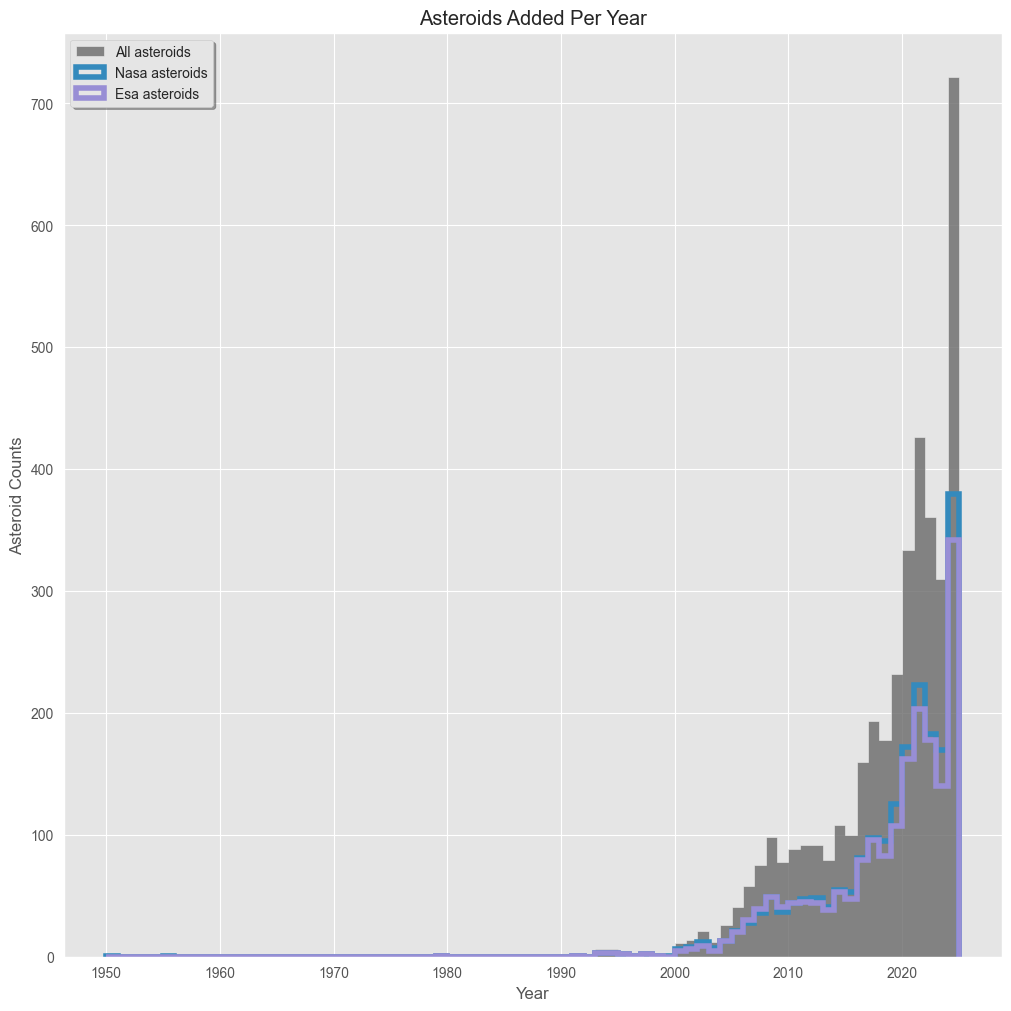

In [136]:
fig, ax = plt.subplots(
    figsize = (10, 10), 
    constrained_layout = True,
)

plt.style.use('ggplot')

# All asteroids
my_bins = np.arange(1950, 2026, 1)

ax.hist(all_year,
           bins = my_bins,
           histtype = 'stepfilled',
           facecolor = 'DimGray',
           alpha = 0.8,
           label = "All asteroids")

# Nasa
ax.hist(nasa_year_table['nasa'],
           bins = my_bins,
           histtype = 'step',
           facecolor = 'blue',
           linewidth = 4,
           label = "Nasa asteroids")
# Esa
ax.hist(esa_year_table['esa'],
           bins = my_bins,
           histtype = 'step',
           facecolor = 'red',
           linewidth = 4,
           label = "Esa asteroids")

ax.set_title("Asteroids Added Per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Asteroid Counts")

ax.legend(loc=0, shadow=True);

### Zoom in (before 2000)

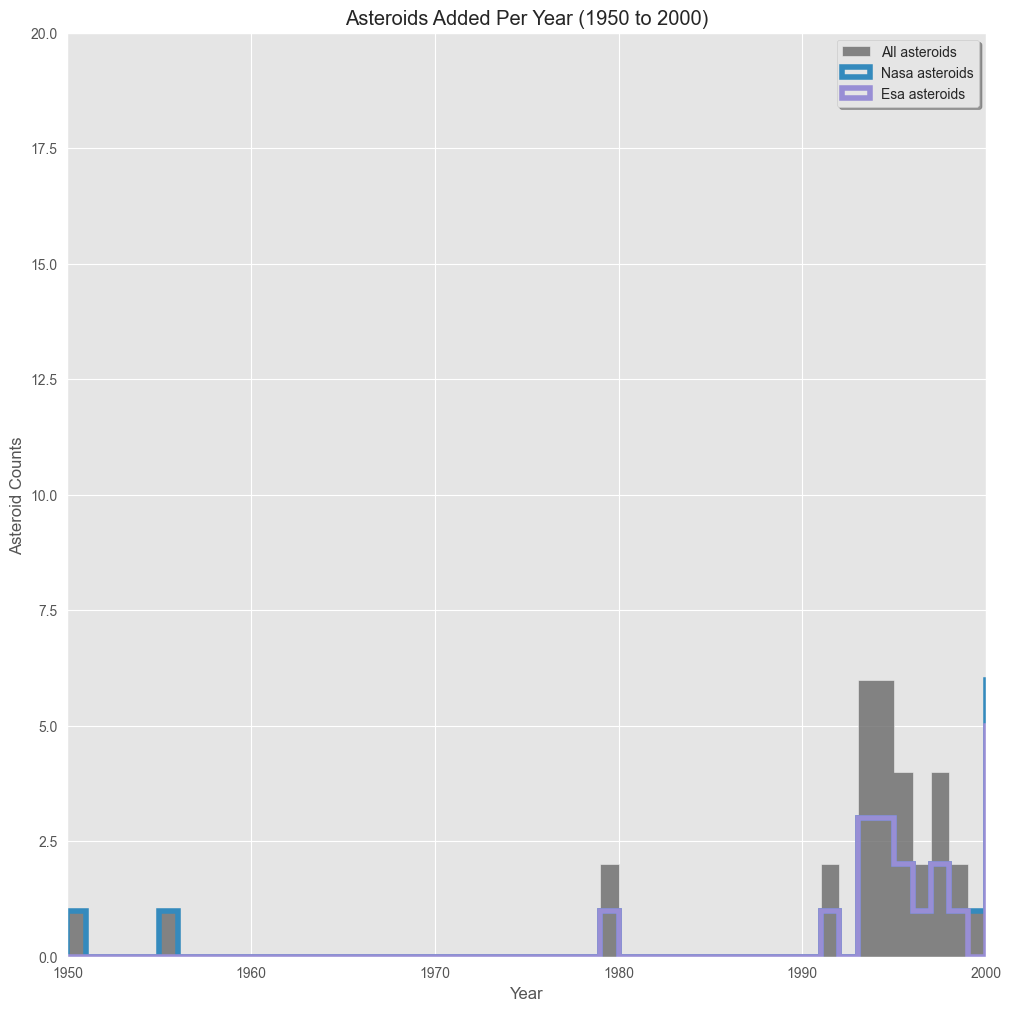

In [137]:
fig, ax = plt.subplots(
    figsize = (10, 10), 
    constrained_layout = True,
)

plt.style.use('ggplot')

# Zoom in to the range 1950 to 2000
ax.set_xlim(1950, 2000)
ax.set_ylim(0, 20)

# All asteroids
my_bins = np.arange(1950, 2026, 1)

ax.hist(all_year,
           bins = my_bins,
           histtype = 'stepfilled',
           facecolor = 'DimGray',
           alpha = 0.8,
           label = "All asteroids")

# Nasa
ax.hist(nasa_year_table['nasa'],
           bins = my_bins,
           histtype = 'step',
           facecolor = 'blue',
           linewidth = 4,
           label = "Nasa asteroids")
# Esa
ax.hist(esa_year_table['esa'],
           bins = my_bins,
           histtype = 'step',
           facecolor = 'red',
           linewidth = 4,
           label = "Esa asteroids")

ax.set_title("Asteroids Added Per Year (1950 to 2000)")
ax.set_xlabel("Year")
ax.set_ylabel("Asteroid Counts")

ax.legend(loc=0, shadow=True);

## Unique Asteroids

In [12]:
def create_difference_tables(nasa_table, esa_table):
    # Normalize Names
    
    def normalize(name):
        return str(name).replace(' ', '').replace('(', '').replace(')', '').upper()

    # IDs w/ perm name
    nasa_to_remove = ['29075', '101955']
    esa_to_remove = ['29075', '101955 Bennu']

    # NASA IDs
    nasa_ids = {normalize(row['des']) for row in nasa_table}
    
    # ESA IDs
    esa_ids = {normalize(row['object_name']) for row in esa_table}
    
    # IDs in NASA but not in ESA
    unique_nasa_ids = nasa_ids - esa_ids
    
    # IDs in ESA but not in NASA
    unique_esa_ids = esa_ids - nasa_ids
    
    print(f"Found {len(unique_nasa_ids)} asteroids unique to NASA.")
    print(f"Found {len(unique_esa_ids)} asteroids unique to ESA.")

    # Filter NASA Table
    nasa_mask = [normalize(x) in unique_nasa_ids for x in nasa_table['des']]
    nasa_unique = QTable(nasa_table[nasa_mask])
    nasa_unique = nasa_unique[~np.isin(nasa_unique['des'], nasa_to_remove)]

    # Filter ESA Table
    esa_mask = [normalize(x) in unique_esa_ids for x in esa_table['object_name']]
    esa_unique = QTable(esa_table[esa_mask])
    esa_unique = esa_unique[~np.isin(esa_unique['object_name'], esa_to_remove)]
    
    return nasa_unique, esa_unique

In [13]:
nasa_unique, esa_unique = create_difference_tables(NASA_SENTRY_table_sum, ESA_table_sum)

Found 342 asteroids unique to NASA.
Found 183 asteroids unique to ESA.


### Asteroids in Nasa but not in Esa

In [14]:
nasa_unique

last_obs,v_inf,ps_max,fullname,ip,des,h,range,last_obs_jd,n_imp,ps_cum,ts_max,diameter,id
str15,str17,str6,str24,str20,str10,str5,str9,str12,int64,str6,object,str7,str8
2018-04-09,20.20,-8.95,(2018 GN),3.772e-09,2018 GN,26.19,2102-2102,2458217.5,1,-8.95,0,0.02,bK18G00N
2014-04-27,21.9988508209515,-5.99,(2014 HN197),6.5351e-09,2014 HN197,19.92,2069-2118,2456774.5,12,-5.51,0,0.35,bK14HJ7N
2009-03-05,10.69,-10.57,(2009 EH1),5.902e-10,2009 EH1,27.85,2068-2068,2454895.5,1,-10.57,0,0.0091,bK09E01H
2019-01-11,11.91,-7.75,(2018 XX2),8.859e-08,2018 XX2,26.02,2106-2106,2458494.5,1,-7.75,0,0.021,bK18X02X
2025-12-18,8.56115460771313,-8.65,(2025 XZ3),5.5049e-07,2025 XZ3,28.83,2090-2115,2461027.5,4,-8.43,0,0.0058,bK25X03Z
2015-03-27,6.48,-9.19,(2015 CT13),4.835e-09,2015 CT13,25.89,2122-2122,2457108.5,1,-9.19,0,0.022,bK15C13T
2016-01-13,17.6490680152751,-7.44,(2015 YV1),9.689e-09,2015 YV1,23.36,2084-2108,2457400.5,2,-7.20,0,0.072,bK15Y01V
2016-04-20,13.32,-9.95,(2016 GW220),5.907e-10,2016 GW220,26.59,2076-2076,2457498.5,1,-9.95,0,0.016,bK16GM0W
2011-03-11,9.13,-9.74,(2011 EU20),3.661e-09,2011 EU20,27.31,2088-2088,2455631.5,1,-9.74,0,0.012,bK11E20U


In [205]:
nasa_unique.write('unique_nasa.ecsv', format='ascii.ecsv', overwrite=True)

In [206]:
esa_unique.write('unique_esa.ecsv', format='ascii.ecsv', overwrite=True)

### Asteroids in Esa but not in Nasa

In [15]:
esa_unique

object_name,diameter_m,estimated_flag,vi_max_date,ip_max,ps_max,ts,vel_km_s,years,ip_cum,ps_cum
str26,str4,str1,str16,str8,str6,str1,str5,str9,str8,str6
2008FF5,80,*,2060-03-27 18:06,1.93E-6,-4.02,0,41.02,2060-2064,1.93E-6,-4.02
2014ML67,60,*,2027-07-03 19:46,5.03E-7,-4.29,0,24.13,2027-2027,5.03E-7,-4.29
2016GU2,60,*,2113-04-01 22:08,3.56E-6,-4.59,0,40.73,2113-2113,3.68E-6,-4.57
2017SH33,900,*,2026-04-30 08:35,6.55E-9,-5.06,0,27.67,2026-2086,7.23E-9,-5.06
2023XJ2,50,*,2109-12-03 09:34,5.00E-6,-5.30,0,12.82,2109-2109,5.00E-6,-5.30
2010EJ27,1100,*,2030-01-12 05:55,8.78E-11,-5.38,0,39.94,2030-2121,1.17E-9,-4.73
2006CD,280,*,2026-07-12 07:52,4.69E-10,-5.82,0,15.44,2026-2084,5.58E-9,-5.50
443104 2013XK22,50,*,2101-06-20 07:38,1.18E-6,-5.85,0,13.14,2101-2102,1.18E-6,-5.85
2016JT38,250,*,2079-11-01 18:16,6.01E-9,-5.91,0,22.12,2079-2079,6.01E-9,-5.91


### Unique Asteroids Plot

In [16]:
unique_nasa_year = date_grab(nasa_unique)
unique_esa_year = date_grab(esa_unique)

unique_nasa_year_table = QTable()
unique_nasa_year_table['nasa'] = unique_nasa_year
unique_esa_year_table = QTable()
unique_esa_year_table['esa'] = unique_esa_year

In [17]:
# Combined Uniques
unique_all_year = np.concatenate([unique_nasa_year, unique_esa_year])

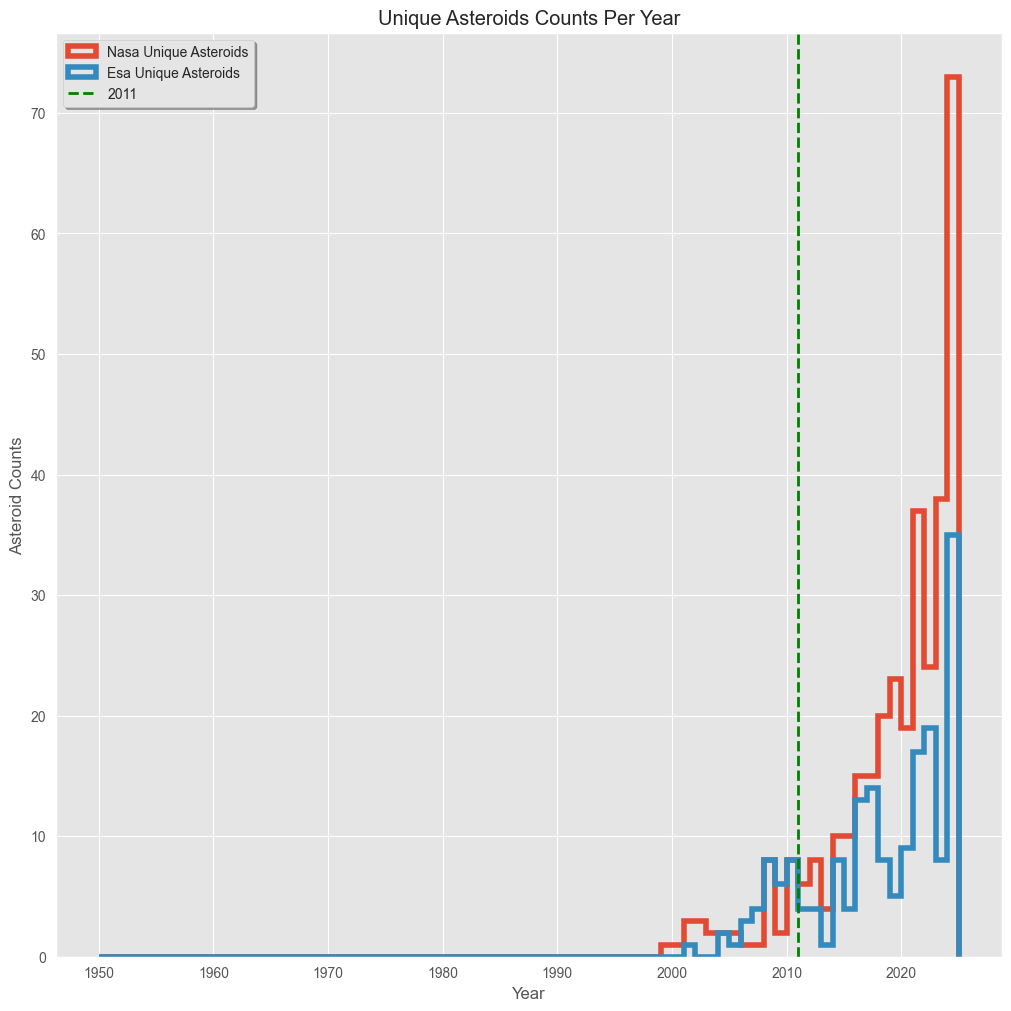

In [127]:
fig, ax = plt.subplots(
    figsize = (10, 10), 
    constrained_layout = True,
)

plt.style.use('ggplot')

# All asteroids
my_bins = np.arange(1950, 2026, 1)

# ax.hist(unique_all_year,
#            bins = my_bins,
#            histtype = 'stepfilled',
#            facecolor = 'DimGray',
#            label = "All asteroids")

# Nasa
ax.hist(unique_nasa_year_table['nasa'],
           bins = my_bins,
           histtype = 'step',
           facecolor = 'Lime',
           linewidth = 4,
           label = "Nasa Unique Asteroids")
# Esa
ax.hist(unique_esa_year_table['esa'],
           bins = my_bins,
           histtype = 'step',
           facecolor = 'MidnightBlue',
           linewidth = 4,
           label = "Esa Unique Asteroids")

ax.axvline(x = 2011, color='green', linestyle='dashed', linewidth=2, label='2011')

ax.set_title("Unique Asteroids Counts Per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Asteroid Counts")

ax.legend(loc=0, shadow=True);

# Probabilities

## IP Probabilities of unique data sets

### Nasa data

In [19]:
# Convert to float if string
nasa_unique_ips = [float(x) for x in nasa_unique['ip']]
print(f"Minimum Impact Prob in Unique NASA: {min(nasa_unique_ips)}")

# Count how many are extremely low risk (< 1e-6)
nasa_low_risk_count = sum(1 for x in nasa_unique_ips if x < 1e-6)
print(f"Percentage of NASA unique objects that are low risk: {nasa_low_risk_count / len(nasa_unique_ips) * 100:.1f}%")

# Count how many are extremely high risk (< 1e-2)
nasa_high_risk_count = sum(1 for x in nasa_unique_ips if x > 1e-4)
print(f"Percentage of NASA unique objects that are high risk: {nasa_high_risk_count / len(nasa_unique_ips) * 100:.1f}%")

Minimum Impact Prob in Unique NASA: 1.008e-10
Percentage of NASA unique objects that are low risk: 87.4%
Percentage of NASA unique objects that are high risk: 2.4%


### Esa data

In [20]:
# Convert to float if string
esa_unique_ips = [float(x) for x in esa_unique['ip_cum']]
print(f"Minimum Impact Prob in Unique ESA: {min(esa_unique_ips)}")

# Count how many are extremely low risk (< 1e-6)
esa_low_risk_count = sum(1 for x in esa_unique_ips if x < 1e-6)
print(f"Percentage of ESA unique objects that are low risk: {esa_low_risk_count / len(esa_unique_ips) * 100:.1f}%")

# Count how many are extremely high risk (< 1e-2)
esa_high_risk_count = sum(1 for x in esa_unique_ips if x > 1e-4)
print(f"Percentage of ESA unique objects that are high risk: {esa_high_risk_count / len(esa_unique_ips) * 100:.1f}%")

Minimum Impact Prob in Unique ESA: 1.09e-11
Percentage of ESA unique objects that are low risk: 91.8%
Percentage of ESA unique objects that are high risk: 0.0%


### Probability Plot

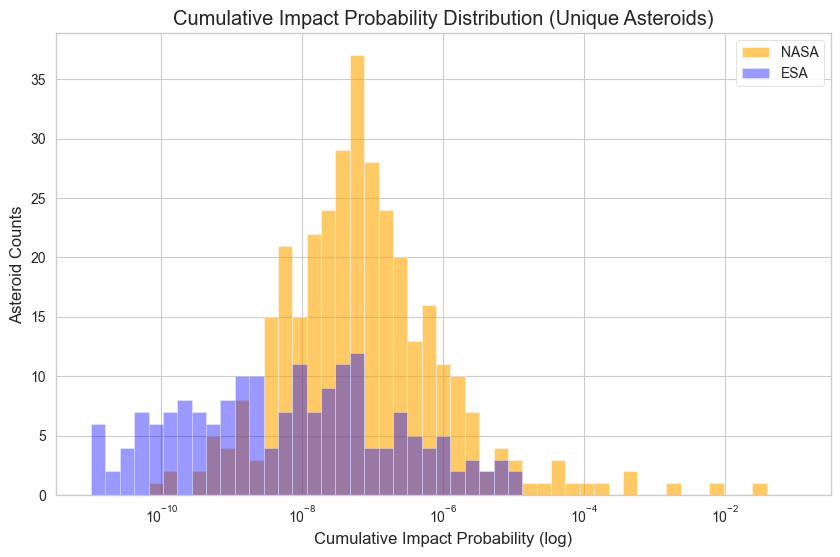

In [116]:
fig, ax = plt.subplots(figsize=(10, 6))

bins = np.logspace(-11, -1, 50)

ax.hist(nasa_unique_ips, bins=bins, alpha=0.6, label='NASA', color='orange')
ax.hist(esa_unique_ips, bins=bins, alpha=0.4, label='ESA', color='blue')

ax.set_xscale('log')

ax.set_title("Cumulative Impact Probability Distribution (Unique Asteroids)")
ax.set_xlabel("Cumulative Impact Probability (log)")
ax.set_ylabel("Asteroid Counts")

ax.legend();

plt.show()

### Nasa Unique High Risk

In [22]:
try:
    nasa_unique['ip'] = nasa_unique['ip'].astype(float)
except ValueError:
    print("Warning: Some IP values could not be converted. Check for empty strings.")

nasa_high_risk_table = nasa_unique[nasa_unique['ip'] > 1e-4]

print(f"Found {len(nasa_high_risk_table)} high-risk objects.")

nasa_high_risk_table

Found 8 high-risk objects.


last_obs,v_inf,ps_max,fullname,ip,des,h,range,last_obs_jd,n_imp,ps_cum,ts_max,diameter,id
str15,str17,str6,str24,float64,str10,str5,str9,str12,int64,str6,object,str7,str8
2022-08-24,5.10001588137266,-2.97,(2010 RF12),0.102637259069,2010 RF12,28.39,2095-2122,2459815.5,70,-2.97,0,0.0071,bK10R12F
2007-06-22,NaN,-4.45,(2006 RH120),0.00816650175,2006 RH120,29.64,2044-2124,2454273.5,119,-4.29,0,0.004,bK06RC0H
2022-11-29,4.62749782026075,-4.45,(2010 VQ),0.0015845932,2010 VQ,27.70,2087-2122,2459912.5,21,-4.41,0,0.0098,bK10V00Q
2014-02-12,1.48848922049079,-6.12,(2011 MD),0.00036184486,2011 MD,28.02,2098-2124,2456700.5,39,-5.40,0,0.0084,bK11M00D
2022-10-01,13.4228003014523,-5.28,(2022 SD9),0.000390246839,2022 SD9,28.41,2100-2122,2459853.5,22,-5.24,0,0.0071,bK22S09D
2020-05-20,NaN,-5.64,(2020 CD3),0.0252338159446,2020 CD3,31.75,2082-2118,2458989.5,115,-5.17,0,0.0015,bK20C03D
2015-09-12,6.29,-4.47,(2000 UK11),0.00011895,2000 UK11,25.00,2122-2122,2457277.5,2,-4.39,0,0.034,bK00U11K
2025-04-19,12.5879698322898,-4.46,(2025 HG),0.0002196587,2025 HG,26.63,2072-2124,2460784.5,10,-4.42,0,0.016,bK25H00G


### Esa Unique High Risk

In [23]:
try:
    esa_unique['ip_cum'] = esa_unique['ip_cum'].astype(float)
except ValueError:
    print("Warning: Some IP values could not be converted. Check for empty strings.")

esa_high_risk_table = esa_unique[esa_unique['ip_cum'] > 1e-4]

print(f"Found {len(esa_high_risk_table)} high-risk objects.")

esa_high_risk_table

Found 0 high-risk objects.


object_name,diameter_m,estimated_flag,vi_max_date,ip_max,ps_max,ts,vel_km_s,years,ip_cum,ps_cum
str26,str4,str1,str16,str8,str6,str1,str5,str9,float64,str6


# Number of observations of unique data sets

### Nasa data

In [24]:
def fetch_nobs_nasa(table_in):
    # Create a copy
    working_table = table_in.copy()
    
    base_url = "https://ssd-api.jpl.nasa.gov/sentry.api"
    nobs_list = []
    
    print(f"Fetching details for {len(working_table)} asteroids...")

    for i, row in enumerate(working_table):
        # Get the designation
        des = str(row['des']).strip() 
        
        # Query the API
        try:
            # Use 'des' for Mode O
            params = {'des': des}
            r = requests.get(base_url, params=params)
            
            if r.status_code == 200:
                data = r.json()
                
                # Extract 'nobs' from the 'summary' dictionary
                if 'summary' in data and 'nobs' in data['summary']:
                    n_obs = int(data['summary']['nobs'])
                    nobs_list.append(n_obs)
                else:
                    # If summary is missing
                    nobs_list.append(-1)
            else:
                print(f"\rError {r.status_code} for {des}")
                nobs_list.append(-1)
                
        except Exception as e:
            print(f"\rFailed on {des}: {e}")
            nobs_list.append(-1)

        # Update progress bar
        print(f"\rProgress: {i+1}/{len(working_table)}", end="", flush=True)
    
    # Add the new column to the table
    working_table['nobs'] = nobs_list
    
    return working_table

In [25]:
nasa_unique_obs = fetch_nobs_nasa(nasa_unique)

nasa_unique_obs

Fetching details for 340 asteroids...
Progress: 340/340

last_obs,v_inf,ps_max,fullname,ip,des,h,range,last_obs_jd,n_imp,ps_cum,ts_max,diameter,id,nobs
str15,str17,str6,str24,float64,str10,str5,str9,str12,int64,str6,object,str7,str8,int64
2018-04-09,20.20,-8.95,(2018 GN),3.772e-09,2018 GN,26.19,2102-2102,2458217.5,1,-8.95,0,0.02,bK18G00N,86
2014-04-27,21.9988508209515,-5.99,(2014 HN197),6.5351e-09,2014 HN197,19.92,2069-2118,2456774.5,12,-5.51,0,0.35,bK14HJ7N,26
2009-03-05,10.69,-10.57,(2009 EH1),5.902e-10,2009 EH1,27.85,2068-2068,2454895.5,1,-10.57,0,0.0091,bK09E01H,21
2019-01-11,11.91,-7.75,(2018 XX2),8.859e-08,2018 XX2,26.02,2106-2106,2458494.5,1,-7.75,0,0.021,bK18X02X,52
2025-12-18,8.56115460771313,-8.65,(2025 XZ3),5.5049e-07,2025 XZ3,28.83,2090-2115,2461027.5,4,-8.43,0,0.0058,bK25X03Z,35
2015-03-27,6.48,-9.19,(2015 CT13),4.835e-09,2015 CT13,25.89,2122-2122,2457108.5,1,-9.19,0,0.022,bK15C13T,46
2016-01-13,17.6490680152751,-7.44,(2015 YV1),9.689e-09,2015 YV1,23.36,2084-2108,2457400.5,2,-7.20,0,0.072,bK15Y01V,57
2016-04-20,13.32,-9.95,(2016 GW220),5.907e-10,2016 GW220,26.59,2076-2076,2457498.5,1,-9.95,0,0.016,bK16GM0W,64
2011-03-11,9.13,-9.74,(2011 EU20),3.661e-09,2011 EU20,27.31,2088-2088,2455631.5,1,-9.74,0,0.012,bK11E20U,74


In [215]:
nasa_unique_obs.write('unique_nasa_nobs.ecsv', format='ascii.ecsv', overwrite=True)

### Esa data

In [26]:
def fetch_nobs_esa(table_in):
    working_table = table_in.copy()
    base_url = "https://neo.ssa.esa.int/PSDB-portlet/download"
    nobs_list = []
    
    print(f"Fetching details for {len(working_table)} ESA asteroids...")

    for i, row in enumerate(working_table):
        # Get the full name
        full_name = str(row['object_name']).strip()
        
        # Extract the ID
        target_id = full_name.split()[0]
        
        # URL for the .rwo file
        file_url = f"{base_url}?file={full_name}.rwo"
        
        count_obs = 0
        try:
            r = requests.get(file_url)
            
            if r.status_code == 200:
                lines = r.text.splitlines()
                
                for line in lines:
                    line = line.strip()
                    if not line: continue
                    
                    parts = line.split()
                    
                    # Check if the first column matches our Target ID
                    if parts[0] == target_id:
                        count_obs += 1
                        
                nobs_list.append(count_obs)
                
            else:
                nobs_list.append(-1)
                
        except Exception as e:
            nobs_list.append(-1)

        print(f"\rProgress: {i+1}/{len(working_table)}", end="", flush=True)
        time.sleep(0.1) 
    
    working_table['nobs'] = nobs_list
    return working_table

In [27]:
esa_unique_obs = fetch_nobs_esa(esa_unique)

esa_unique_obs

Fetching details for 183 ESA asteroids...
Progress: 183/183

object_name,diameter_m,estimated_flag,vi_max_date,ip_max,ps_max,ts,vel_km_s,years,ip_cum,ps_cum,nobs
str26,str4,str1,str16,str8,str6,str1,str5,str9,float64,str6,int64
2008FF5,80,*,2060-03-27 18:06,1.93E-6,-4.02,0,41.02,2060-2064,1.93e-06,-4.02,52
2014ML67,60,*,2027-07-03 19:46,5.03E-7,-4.29,0,24.13,2027-2027,5.03e-07,-4.29,6
2016GU2,60,*,2113-04-01 22:08,3.56E-6,-4.59,0,40.73,2113-2113,3.68e-06,-4.57,30
2017SH33,900,*,2026-04-30 08:35,6.55E-9,-5.06,0,27.67,2026-2086,7.23e-09,-5.06,22
2023XJ2,50,*,2109-12-03 09:34,5.00E-6,-5.30,0,12.82,2109-2109,5e-06,-5.30,385
2010EJ27,1100,*,2030-01-12 05:55,8.78E-11,-5.38,0,39.94,2030-2121,1.17e-09,-4.73,31
2006CD,280,*,2026-07-12 07:52,4.69E-10,-5.82,0,15.44,2026-2084,5.58e-09,-5.50,16
443104 2013XK22,50,*,2101-06-20 07:38,1.18E-6,-5.85,0,13.14,2101-2102,1.18e-06,-5.85,99
2016JT38,250,*,2079-11-01 18:16,6.01E-9,-5.91,0,22.12,2079-2079,6.01e-09,-5.91,17


In [208]:
esa_unique_obs.write('unique_esa_nobs.ecsv', format='ascii.ecsv', overwrite=True)

### Nasa plot

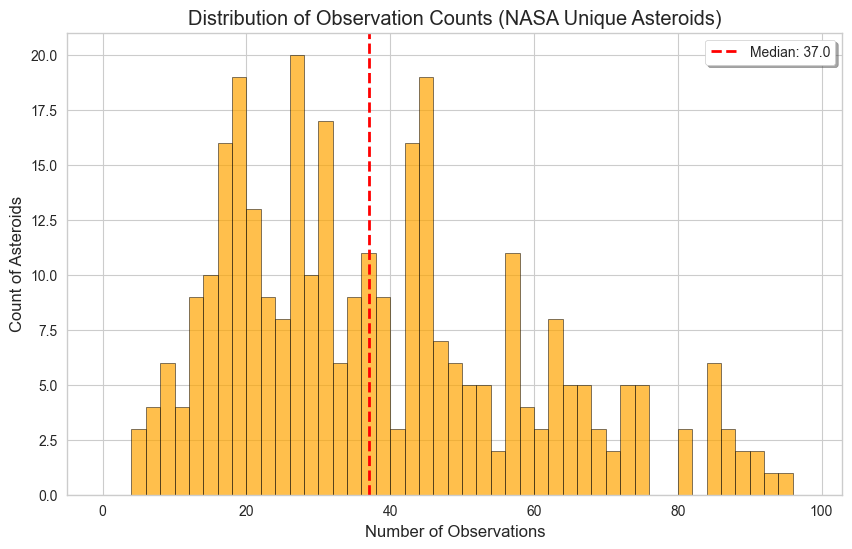

In [117]:
# Get counts
nasa_obs_counts = nasa_unique_obs['nobs']

# Calculate stats
nasa_median_obs = np.median(nasa_obs_counts)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(nasa_obs_counts, bins=np.arange(0, 100, 2), color='orange', edgecolor='black', alpha=0.7)

ax.set_title("Distribution of Observation Counts (NASA Unique Asteroids)")
ax.set_xlabel("Number of Observations")
ax.set_ylabel("Count of Asteroids")

ax.axvline(nasa_median_obs, color='red', linestyle='dashed', linewidth=2, label=f'Median: {nasa_median_obs}')

ax.legend(loc=0, shadow=True);

plt.show()

### Esa plot

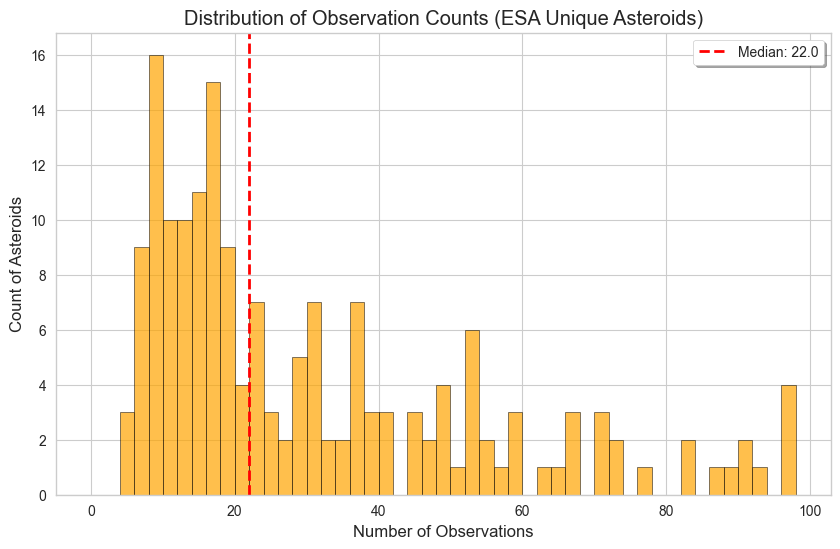

In [118]:
# Get counts
esa_obs_counts = esa_unique_obs['nobs']

# Calculate stats
esa_median_obs = np.median(esa_obs_counts)

# Plot 
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(esa_obs_counts, bins=np.arange(0, 100, 2), color='orange', edgecolor='black', alpha=0.7)

ax.set_title("Distribution of Observation Counts (ESA Unique Asteroids)")
ax.set_xlabel("Number of Observations")
ax.set_ylabel("Count of Asteroids")

ax.axvline(esa_median_obs, color='red', linestyle='dashed', linewidth=2, label=f'Median: {esa_median_obs}')

ax.legend(loc=0, shadow=True);

plt.show()

### Combined plot

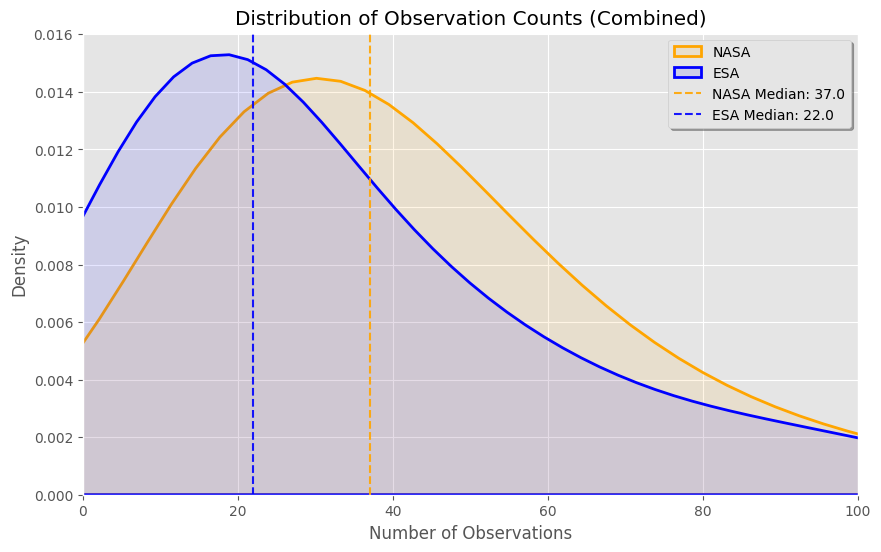

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plots
sns.kdeplot(nasa_obs_counts, ax=ax, color='orange', linewidth=2, fill=True, alpha=0.1, label='NASA')
sns.kdeplot(esa_obs_counts, ax=ax, color='blue', linewidth=2, fill=True, alpha=0.1, label='ESA')

# Add median lines
ax.axvline(np.median(nasa_obs_counts), color='orange', linestyle='--', alpha=0.9, label=f'NASA Median: {np.median(nasa_obs_counts)}')
ax.axvline(np.median(esa_obs_counts), color='blue', linestyle='--', alpha=0.9, label=f'ESA Median: {np.median(esa_obs_counts)}')

ax.set_xlim(0, 100) 

ax.set_title("Distribution of Observation Counts (Combined)")
ax.set_xlabel("Number of Observations")
ax.set_ylabel("Density")

ax.legend(loc=0, shadow=True);

plt.show()

# Diameter Distribution Of Unique Asteroids

In [187]:
# Convert to float if string
nasa_unique_dia = nasa_unique['diameter'].astype(float) * 1000
print(f"Maximum diameter in Unique NASA: {max(nasa_unique_dia)}m")

# Count how many are extremely high risk (< 1e2)
nasa_unique_large_d = sum(1 for x in nasa_unique_dia if x > 1e2)
print(f"Percentage of NASA unique objects that are large: {nasa_unique_large_d / len(nasa_unique_dia) * 100:.1f}%")

Maximum diameter in Unique NASA: 1010.0m
Percentage of NASA unique objects that are large: 2.6%


In [186]:
# Convert to float if string
esa_unique_dia = esa_unique['diameter_m'].astype(float)
print(f"Maximum diameter in Unique ESA: {max(esa_unique_dia)}m")

# Count how many are extremely high risk (< 1e2)
esa_unique_large_d = sum(1 for x in esa_unique_dia if x > 1e2)
print(f"Percentage of ESA unique objects that are large: {esa_unique_large_d / len(esa_unique_dia) * 100:.1f}%")

Maximum diameter in Unique ESA: 1100.0m
Percentage of ESA unique objects that are large: 9.3%


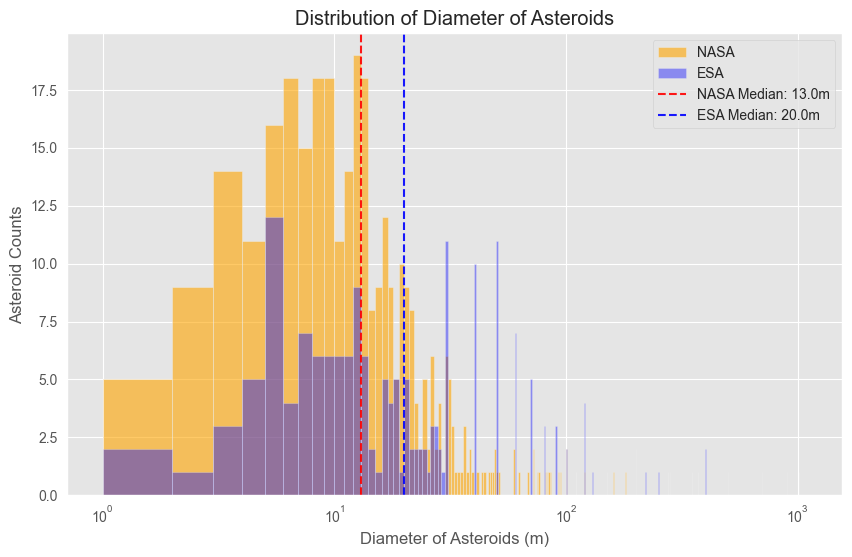

In [190]:
fig, ax = plt.subplots(figsize=(10, 6))

bins = np.arange(1, 1100, 1)
nasa_unique_dia = nasa_unique['diameter'].astype(float) * 1000
esa_unique_dia = esa_unique['diameter_m'].astype(float)

ax.set_xscale('log')

ax.hist(nasa_unique_dia, bins=bins, alpha=0.6, label='NASA', color='orange')
ax.hist(esa_unique_dia, bins=bins, alpha=0.4, label='ESA', color='blue')

ax.axvline(np.median(nasa_unique_dia), color='red', linestyle='--', alpha=0.9, label=f'NASA Median: {np.median(nasa_unique_dia)}m')
ax.axvline(np.median(esa_unique_dia), color='blue', linestyle='--', alpha=0.9, label=f'ESA Median: {np.median(esa_unique_dia)}m')

ax.set_title("Distribution of Diameter of Asteroids")
ax.set_xlabel("Diameter of Asteroids (m)")
ax.set_ylabel("Asteroid Counts")

ax.legend();

plt.show()

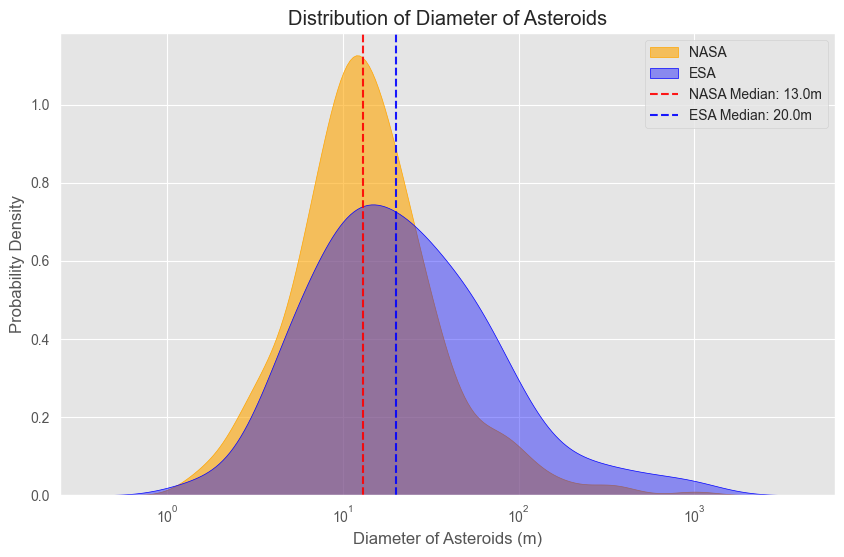

In [193]:
fig, ax = plt.subplots(figsize=(10, 6))

nasa_unique_dia = nasa_unique['diameter'].astype(float) * 1000
esa_unique_dia = esa_unique['diameter_m'].astype(float)

sns.kdeplot(nasa_unique_dia, fill=True, alpha=0.6, label='NASA', color='orange', log_scale=True, ax=ax)
sns.kdeplot(esa_unique_dia, fill=True, alpha=0.4, label='ESA', color='blue', log_scale=True, ax=ax)

ax.axvline(np.median(nasa_unique_dia), color='red', linestyle='--', alpha=0.9, label=f'NASA Median: {np.median(nasa_unique_dia):.1f}m')
ax.axvline(np.median(esa_unique_dia), color='blue', linestyle='--', alpha=0.9, label=f'ESA Median: {np.median(esa_unique_dia):.1f}m')

ax.set_title("Distribution of Diameter of Asteroids")
ax.set_xlabel("Diameter of Asteroids (m)")
ax.set_ylabel("Probability Density") 

ax.legend()
plt.show();

# Shared Asteroids

In [31]:
def create_shared_tables(nasa_table, esa_table):
    # Normalize Names
    def normalize(name):
        return str(name).replace(' ', '').replace('(', '').replace(')', '').upper()

    # NASA IDs
    nasa_ids = {normalize(row['des']) for row in nasa_table}
    
    # ESA IDs
    esa_ids = {normalize(row['object_name']) for row in esa_table}
    
    # Shared IDs
    shared_ids = nasa_ids & esa_ids    
    
    print(f"Found {len(shared_ids)} asteroids shared.")

    # Filter NASA Table
    nasa_mask = [normalize(x) in shared_ids for x in nasa_table['des']]
    nasa_shared = QTable(nasa_table[nasa_mask])

    # Filter ESA Table
    esa_mask = [normalize(x) in shared_ids for x in esa_table['object_name']]
    esa_shared = QTable(esa_table[esa_mask])

    # Add list
    nasa_shared_list = ['29075 (1950 DA)', '101955 Bennu (1999 RQ36)']
    esa_shared_list = ['29075', '101955 Bennu']
    
    # Find these rows in the original tables
    nasa_manual_rows = nasa_table[np.isin(nasa_table['des'], nasa_shared_list)]
    esa_manual_rows = esa_table[np.isin(esa_table['object_name'], esa_shared_list)]
    
    # Add them to the shared tables
    if len(nasa_manual_rows) > 0:
        nasa_shared = vstack([nasa_shared, nasa_manual_rows])
        
    if len(esa_manual_rows) > 0:
        esa_shared = vstack([esa_shared, esa_manual_rows])
    
    return nasa_shared, esa_shared

In [32]:
nasa_shared, esa_shared = create_shared_tables(NASA_SENTRY_table_sum, ESA_table_sum)

Found 1725 asteroids shared.


## Nasa Shared Table

In [33]:
nasa_shared

last_obs,v_inf,ps_max,fullname,ip,des,h,range,last_obs_jd,n_imp,ps_cum,ts_max,diameter,id
str15,str17,str6,str24,str20,str10,str5,str9,str12,int64,str6,object,str7,str8
1979-12-15,23.7606234552547,-2.99,(1979 XB),8.515158e-07,1979 XB,18.54,2056-2113,2444222.5,4,-2.69,0,0.66,bJ79X00B
2022-05-23,15.5694051293592,-5.79,(2022 KK2),0.0001203297828,2022 KK2,28.45,2060-2122,2459722.5,33,-5.59,0,0.0069,bK22K02K
2000-10-03,1.35802744453748,-3.11,(2000 SG344),0.002743395186,2000 SG344,24.79,2069-2122,2451820.5,300,-2.77,0,0.037,bK00SY4G
2012-11-16,11.4626328606267,-6.05,(2012 VS76),1.9442009e-05,2012 VS76,26.95,2081-2120,2456247.5,15,-5.74,0,0.014,bK12V76S
2013-01-12,8.55,-6.16,(2011 TO),2.937e-06,2011 TO,26.32,2064-2064,2456304.5,1,-6.16,0,0.018,bK11T00O
2012-02-21,7.21203952320587,-6.27,(2012 BA102),1.22522146e-05,2012 BA102,26.51,2103-2122,2455978.5,20,-6.03,0,0.017,bK12BA2A
2005-11-22,12.3834503195676,-6.95,(2005 UL6),9.90088e-08,2005 UL6,24.51,2068-2119,2453696.5,6,-6.70,0,0.042,bK05U06L
2009-02-24,22.0982648784577,-7.38,(2009 DV),3.1018e-08,2009 DV,24.86,2044-2102,2454886.5,2,-7.25,0,0.036,bK09D00V
2021-06-12,11.47,-8.05,(2021 LY1),8.724e-08,2021 LY1,28.13,2040-2040,2459377.5,1,-8.05,0,0.008,bK21L01Y


In [209]:
nasa_shared.write('shared_nasa.ecsv', format='ascii.ecsv', overwrite=True)

## ESA Shared Table

In [34]:
esa_shared

object_name,diameter_m,estimated_flag,vi_max_date,ip_max,ps_max,ts,vel_km_s,years,ip_cum,ps_cum
str26,str4,str1,str16,str8,str6,str1,str5,str9,str8,str6
2023VD3,14,*,2034-11-08 17:08,2.35E-3,-2.67,0,21.01,2034-2039,2.35E-3,-2.67
2008JL3,30,*,2027-05-01 09:05,1.49E-4,-2.73,0,14.01,2027-2122,1.61E-4,-2.73
1979XB,500,*,2056-12-12 21:38,2.34E-7,-2.82,0,27.54,2056-2113,7.34E-7,-2.70
2000SG344,40,*,2071-09-16 00:54,8.95E-4,-3.18,0,11.27,2069-2122,2.82E-3,-2.77
2005QK76,40,*,2030-02-26 08:15,3.01E-5,-3.39,0,22.66,2030-2108,6.42E-5,-3.26
2007KE4,30,*,2029-05-26 00:18,4.27E-5,-3.47,0,15.03,2026-2115,4.37E-5,-3.47
2021GX9,30,*,2032-04-16 21:51,5.03E-5,-3.49,0,20.17,2032-2032,5.03E-5,-3.49
2023DO,27,*,2057-03-23 19:43,4.89E-4,-3.50,0,13.18,2057-2073,5.00E-4,-3.49
2024RF10,11,*,2092-09-07 12:39,6.42E-3,-3.59,0,14.21,2092-2118,7.66E-3,-3.51


In [210]:
esa_shared.write('shared_esa.ecsv', format='ascii.ecsv', overwrite=True)

## Shared IP Distribution

In [1]:
# Convert to float if string
nasa_shared_ips = [float(x) for x in nasa_shared['ip']]
print(f"Minimum Impact Prob in Unique NASA: {min(nasa_shared_ips)}")

# Count how many are extremely low risk (< 1e-6)
nasa_low_risk_shared = sum(1 for x in nasa_shared_ips if x < 1e-6)
print(f"Percentage of NASA shared objects that are low risk: {nasa_low_risk_shared / len(nasa_shared_ips) * 100:.1f}%")

# Count how many are extremely high risk (< 1e-3)
nasa_high_risk_shared = sum(1 for x in nasa_shared_ips if x > 1e-3)
print(f"Percentage of NASA shared objects that are high risk: {nasa_high_risk_shared / len(nasa_shared_ips) * 100:.1f}%")

NameError: name 'nasa_shared' is not defined

In [36]:
# Convert to float if string
esa_shared_ips = [float(x) for x in esa_shared['ip_cum']]
print(f"Minimum Impact Prob in Unique ESA: {min(esa_shared_ips)}")

# Count how many are extremely low risk (< 1e-6)
esa_low_risk_shared = sum(1 for x in esa_shared_ips if x < 1e-6)
print(f"Percentage of ESA shared objects that are low risk: {esa_low_risk_shared / len(esa_shared_ips) * 100:.1f}%")

# Count how many are extremely high risk (< 1e-3)
esa_high_risk_shared = sum(1 for x in esa_shared_ips if x > 1e-3)
print(f"Percentage of ESA shared objects that are high risk: {esa_high_risk_shared / len(esa_shared_ips) * 100:.1f}%")

Minimum Impact Prob in Unique ESA: 1.09e-11
Percentage of ESA shared objects that are low risk: 37.0%
Percentage of ESA shared objects that are high risk: 1.5%


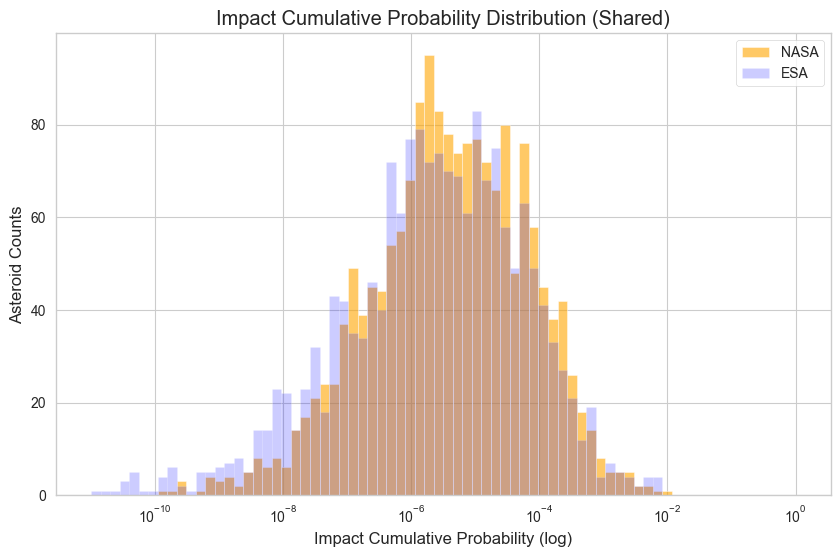

In [113]:
fig, ax = plt.subplots(figsize=(10, 6))

bins = np.logspace(-11, 0, 75)

ax.hist(nasa_shared_ips, bins=bins, alpha=0.6, label='NASA', color='orange')
ax.hist(esa_shared_ips, bins=bins, alpha=0.2, label='ESA', color='blue')

ax.set_xscale('log')

ax.set_title("Impact Cumulative Probability Distribution (Shared)")
ax.set_xlabel("Impact Cumulative Probability (log)")
ax.set_ylabel("Asteroid Counts")

ax.legend();

plt.show()

# V infinity vs IP

In [198]:
def plot_vinf_ip(table, vinf_col='v_inf', ip_col='ip'):
    # Extract data
    v_inf = np.array(table[vinf_col], dtype=float)
    ip = np.array(table[ip_col], dtype=float)
    
    clean_mask = np.isfinite(v_inf) & np.isfinite(ip) & (ip > 0)
    v_inf = v_inf[clean_mask]
    ip = ip[clean_mask]

    # Round V_inf to group by every 1 km/s
    bin_size = 1
    v_inf_binned = np.round(v_inf / bin_size) * bin_size

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.set_style('whitegrid')

    sns.lineplot(
        x = v_inf_binned,
        y = ip,
        estimator = np.median,
        errorbar = ('pi', 100),
        color = 'green',
        linewidth = 2,
        ax = ax,
        label = 'Median IP'
    )

    ax.set_yscale('log')
    ax.invert_xaxis()

    ax.set_title(r"NASA Sentry Impact Probability vs. $V_{inf}$")
    ax.set_ylabel("Cumulative Impact Probability (log)")
    ax.set_xlabel("$V_{inf}$ (km/s)")
    ax.legend();

    plt.show()

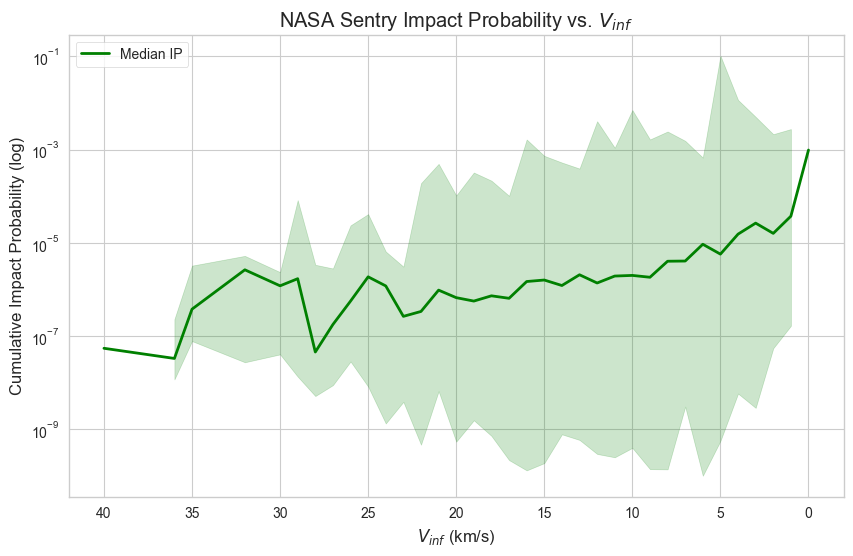

In [200]:
plot_vinf_ip(NASA_SENTRY_table_sum)